## data acquisition

In [1]:
import tushare as ts
import torch
import pandas as pd
import talib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(f'tushare version:{ts.__version__}')
print(f'torch version:{torch.__version__}')
print(f'pandas version:{pd.__version__}')
print(f'talib version:{talib.__version__}')

tushare version:1.2.62
torch version:1.3.1
pandas version:0.20.3
talib version:0.4.19


In [3]:
class Args:
    def __init__(self):
        self.stock_code = '000001.SH'
        self.startdate = '20100901'
        self.enddate = '20190901'
        self.predict_col='close'
        self.ratio = 0.2
        self.window_size = 50
        self.input_dim = 8
        self.hidden_dim = 32
        self.num_layers = 2
        self.output_dim = 1
        self.num_epochs = 50
        self.features = []
        
args = Args()

### these two following blocks are exclusive for each other  
  
the first one is for downloading data  
  
the second one is for loading data if you have already downloaded what you need.

In [4]:
ts.set_token('1fe161e9d8fb8b8e53c863528c68dba6a690f64bdafe6579586b1d17')
pro = ts.pro_api()
df = pro.index_daily(ts_code=args.stock_code, start_date=args.startdate, end_date=args.enddate)
df1 = pd.DataFrame(df)
path = args.stock_code + '.csv'
df1.to_csv(path)

In [ ]:
df1 = pd.read_csv('../'+args.stock_code+'.csv',index_col=0)

In [6]:
df1.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20190830,2886.2365,2907.3825,2914.5767,2874.1028,2890.9192,-4.6827,-0.1620,193959951.0,224751169.9
1,000001.SH,20190829,2890.9192,2895.9991,2898.6046,2878.5878,2893.7564,-2.8372,-0.0980,178613082.0,196332770.5
2,000001.SH,20190828,2893.7564,2901.6267,2905.4354,2887.0115,2902.1932,-8.4368,-0.2907,183097903.0,201805050.6
3,000001.SH,20190827,2902.1932,2879.5154,2919.6444,2879.4060,2863.5673,38.6259,1.3489,208141794.0,230999692.9
4,000001.SH,20190826,2863.5673,2851.0158,2870.4939,2849.2381,2897.4253,-33.8580,-1.1686,169895363.0,191036667.9


In [7]:
df1 = df1[['trade_date','open', 'high', 'close', 'low', 'vol', 'change']]
df1 = df1.sort_values(by='trade_date').reset_index()

In [8]:
df1.drop('index',axis=1,inplace=True)

In [9]:
df1.head()

,trade_date,open,high,close,low,vol,change
0,20100901,2641.053,2662.876,2622.882,2604.487,127164940.0,-15.916
1,20100902,2646.893,2659.978,2655.776,2636.418,124076238.0,32.894
2,20100903,2658.129,2660.539,2655.394,2631.851,129456526.0,-0.382
3,20100906,2667.195,2698.601,2696.250,2664.239,144209066.0,40.856
4,20100907,2698.218,2704.933,2698.363,2679.023,112231539.0,2.113


## feature engineering and preprocessing

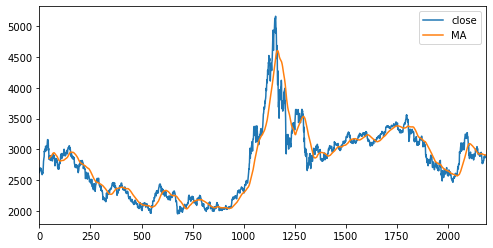

In [10]:
df1['MA'] = talib.SMA(df1['close'],args.window_size-1)
df1[['close','MA']].plot(figsize=(8,4))
plt.show()

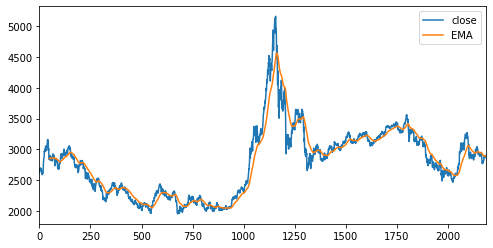

In [11]:
df1['EMA'] = talib.EMA(df1['close'], timeperiod = args.window_size-1)
df1[['close','EMA']].plot(figsize=(8,4))
plt.show()

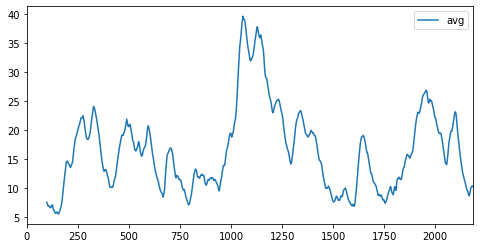

In [12]:
df1['avg'] = talib.ADX(df1['high'],df1['low'], df1['close'], timeperiod=args.window_size-1)
df1[['avg']].plot(figsize=(8,4))

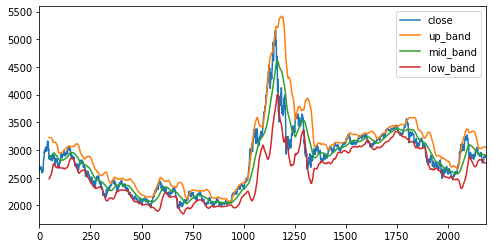

In [13]:
df1['up_band'], df1['mid_band'], df1['low_band'] =   \
                         talib.BBANDS(df1['close'], timeperiod =args.window_size-1)
df1[['close','up_band','mid_band','low_band']].plot(figsize=  
                                   (8,4))
plt.show()

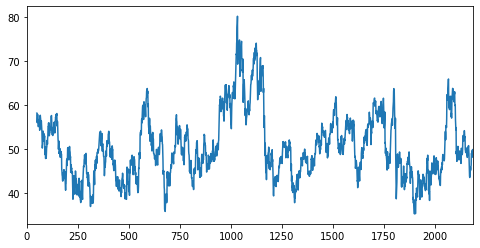

In [14]:
df1['Relative'] = talib.RSI(df1['close'],args.window_size-1)
df1['Relative'].plot(figsize=(8,4))
plt.show()

In [15]:
df1.head()

,trade_date,open,high,close,low,vol,change,MA,EMA,avg,up_band,mid_band,low_band,Relative
0,20100901,2641.053,2662.876,2622.882,2604.487,127164940.0,-15.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20100902,2646.893,2659.978,2655.776,2636.418,124076238.0,32.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20100903,2658.129,2660.539,2655.394,2631.851,129456526.0,-0.382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20100906,2667.195,2698.601,2696.250,2664.239,144209066.0,40.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20100907,2698.218,2704.933,2698.363,2679.023,112231539.0,2.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.DataFrame(df1,columns=['close','MA','EMA','avg','up_band','mid_band','low_band','Relative']).corr()

,close,MA,EMA,avg,up_band,mid_band,low_band,Relative
close,1.000000,0.938284,0.954983,0.322579,0.915107,0.938284,0.888154,0.419223
MA,0.938284,1.000000,0.996809,0.265890,0.975259,1.000000,0.946630,0.152466
EMA,0.954983,0.996809,1.000000,0.272899,0.970114,0.996809,0.946573,0.183448
avg,0.322579,0.265890,0.272899,1.000000,0.395924,0.265890,0.052625,0.170900
up_band,0.915107,0.975259,0.970114,0.395924,1.000000,0.975259,0.851954,0.171131
mid_band,0.938284,1.000000,0.996809,0.265890,0.975259,1.000000,0.946630,0.152466
low_band,0.888154,0.946630,0.946573,0.052625,0.851954,0.946630,1.000000,0.111623
Relative,0.419223,0.152466,0.183448,0.170900,0.171131,0.152466,0.111623,1.000000


In [18]:
args.features = ['MA','EMA','avg','up_band','mid_band','low_band','Relative']
args.input_dim = 1+len(args.features)

In [19]:
df1.dropna(inplace=True)

In [20]:
df1.head()

,trade_date,open,high,close,low,vol,change,MA,EMA,avg,up_band,mid_band,low_band,Relative
97,20110127,2690.825,2753.001,2749.150,2677.210,105569163.0,40.336,2819.615694,2798.810261,7.595186,2953.001087,2819.615694,2686.230301,50.353124
98,20110128,2741.314,2759.440,2752.750,2733.291,85427992.0,3.600,2816.843939,2796.967851,7.545519,2950.027347,2816.843939,2683.660530,50.472254
99,20110131,2751.527,2790.921,2790.694,2748.538,91502814.0,37.944,2814.932163,2796.716897,7.443751,2946.866942,2814.932163,2682.997385,51.718786
100,20110201,2795.071,2805.049,2798.960,2785.296,73350092.0,8.266,2814.333755,2796.806621,7.320596,2946.286892,2814.333755,2682.380619,51.987516
101,20110209,2778.701,2804.208,2774.065,2764.867,87257788.0,-24.895,2812.581286,2795.896956,7.232708,2944.346071,2812.581286,2680.816501,51.112855


In [21]:
from sklearn.preprocessing import MinMaxScaler

price = df1.loc[:,[args.predict_col]+args.features]
print(price.shape)
for i in range(len(price.columns)):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    price.iloc[:,i] = scaler.fit_transform(price.iloc[:,i].values.reshape(-1,1))

(2091, 8)


In [22]:
price.head()

,close,MA,EMA,avg,up_band,mid_band,low_band,Relative
97,-0.503076,-0.388487,-0.400866,-0.882651,-0.473565,-0.388487,-0.220899,-0.328692
98,-0.500838,-0.390640,-0.402327,-0.885574,-0.475344,-0.390640,-0.223283,-0.323373
99,-0.477243,-0.392126,-0.402526,-0.891563,-0.477235,-0.392126,-0.223898,-0.267709
100,-0.472103,-0.392591,-0.402455,-0.898810,-0.477582,-0.392591,-0.224470,-0.255708
101,-0.487584,-0.393953,-0.403177,-0.903982,-0.478743,-0.393953,-0.225921,-0.294767


In [23]:
import numpy as np

'''
    for the input stock,
    slice it for a lookback size and make one step further,
    ratio determines the size of train and test set,
    choose the last price of every slice as label
'''
def split_data(stock, lookback, ratio=0.2):
    data_raw = stock
    assert type(data_raw)==np.ndarray,f'{type(data_raw)}'
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(ratio*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = np.expand_dims(data[:train_set_size,-1,0],-1)
    
    x_test = data[train_set_size:,:-1]
    y_test = np.expand_dims(data[train_set_size:,-1,0],-1)
    
    return [x_train, y_train, x_test, y_test]


lookback = args.window_size # choose sequence length
x_train, y_train, x_test, y_test = split_data(price.values, lookback,args.ratio)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1633, 49, 8), (1633, 1), (408, 49, 8), (408, 1))

In [25]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

## train model

In [26]:
'''
    create lstm model with nn.lstm receiving batch-first data
    and fully connected layer as model head
'''
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [27]:
class RMSELoss(torch.nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.mse = torch.nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

model = LSTM(input_dim=args.input_dim, hidden_dim=args.hidden_dim, output_dim=args.output_dim, num_layers=args.num_layers)
criterion = RMSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
import time
hist = np.zeros(args.num_epochs)
start_time = time.time()
lstm = []
for t in range(args.num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "RMSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 RMSE:  0.5927897691726685
Epoch  1 RMSE:  0.41467955708503723
Epoch  2 RMSE:  0.2788410484790802
Epoch  3 RMSE:  0.2601878345012665
Epoch  4 RMSE:  0.19342826306819916
Epoch  5 RMSE:  0.1738848239183426
Epoch  6 RMSE:  0.12605254352092743
Epoch  7 RMSE:  0.15506480634212494
Epoch  8 RMSE:  0.12611150741577148
Epoch  9 RMSE:  0.13612493872642517
Epoch  10 RMSE:  0.1127084493637085
Epoch  11 RMSE:  0.10228176414966583
Epoch  12 RMSE:  0.10556686669588089
Epoch  13 RMSE:  0.09160139411687851
Epoch  14 RMSE:  0.09810870885848999
Epoch  15 RMSE:  0.09352695941925049
Epoch  16 RMSE:  0.08058962970972061
Epoch  17 RMSE:  0.08233870565891266
Epoch  18 RMSE:  0.06909185647964478
Epoch  19 RMSE:  0.07150274515151978
Epoch  20 RMSE:  0.06615596264600754
Epoch  21 RMSE:  0.06685240566730499
Epoch  22 RMSE:  0.06289684772491455
Epoch  23 RMSE:  0.0627349317073822
Epoch  24 RMSE:  0.0585382841527462
Epoch  25 RMSE:  0.05810284987092018
Epoch  26 RMSE:  0.05550035461783409
Epoch  27 RMSE:  0

## evaluate model

In [29]:
with torch.no_grad():
    y_test_pred = model(x_test)
    loss = criterion(y_test_pred, y_test_lstm)
loss

tensor(0.0391)

In [30]:
y_test_pred
# y_test_lstm

tensor([[-0.1887],
        [-0.1946],
        [-0.1929],
        [-0.1863],
        [-0.1668],
        [-0.1453],
        [-0.1269],
        [-0.1154],
        [-0.1052],
        [-0.0986],
        [-0.0935],
        [-0.0901],
        [-0.0876],
        [-0.0943],
        [-0.0920],
        [-0.0856],
        [-0.0709],
        [-0.0555],
        [-0.0419],
        [-0.0205],
        [-0.0012],
        [ 0.0050],
        [ 0.0078],
        [-0.0071],
        [-0.0360],
        [-0.0594],
        [-0.0840],
        [-0.0926],
        [-0.0843],
        [-0.1150],
        [-0.1607],
        [-0.2025],
        [-0.2559],
        [-0.2814],
        [-0.2809],
        [-0.2702],
        [-0.2420],
        [-0.2155],
        [-0.1895],
        [-0.1837],
        [-0.1938],
        [-0.2003],
        [-0.2082],
        [-0.2124],
        [-0.2055],
        [-0.2032],
        [-0.1986],
        [-0.1905],
        [-0.1799],
        [-0.1775],
        [-0.1830],
        [-0.1887],
        [-0.

'------------------------------------------------real data visualization---------------------------------------------------'

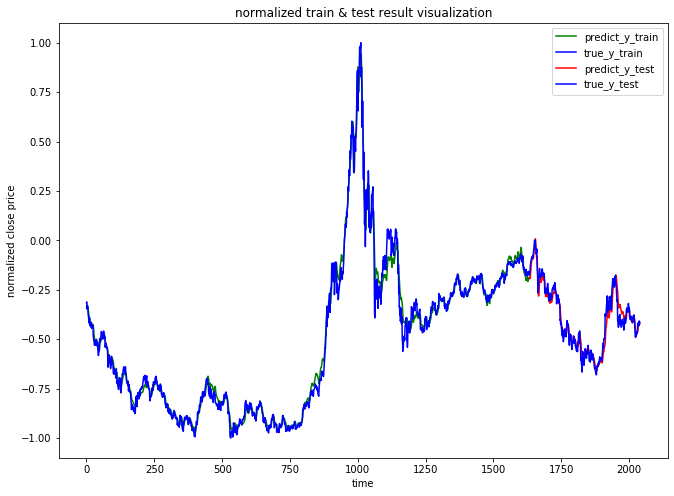

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
final_y_train_pred = model(x_train)



fig =plt.figure(figsize=(24,8))
'''------------------------------------------------normalized data visualization---------------------------------------------------'''
plt.subplot(121)
t_train = np.arange(0,len(y_train_lstm))
plt.plot(t_train,final_y_train_pred.detach(),color='g',label='predict_y_train')
plt.plot(t_train,y_train_lstm,color='b',label='true_y_train')

t_test = np.arange(len(y_train_lstm),len(y_train_lstm)+len(y_test_lstm))
plt.plot(t_test,y_test_pred.detach(),color='r',label='predict_y_test')
plt.plot(t_test,y_test_lstm,color='b',label='true_y_test')

plt.title('normalized train & test result visualization')
plt.xlabel('time')
plt.ylabel('normalized close price')
plt.legend()

'''------------------------------------------------real data visualization---------------------------------------------------'''
# plt.subplot(122)
# real_y_train = scaler.inverse_transform(y_train_lstm)
# real_y_train_pred = scaler.inverse_transform(final_y_train_pred.detach())
# real_y_test = scaler.inverse_transform(y_test_lstm)
# real_y_test_pred = scaler.inverse_transform(y_test_pred.detach())

# t_train = np.arange(0,len(y_train_lstm))
# plt.plot(t_train,real_y_train_pred,color='g',label='predict_y_train')
# plt.plot(t_train,real_y_train,color='b',label='true_y_train')

# t_test = np.arange(len(y_train_lstm),len(y_train_lstm)+len(y_test_lstm))
# plt.plot(t_test,real_y_test_pred,color='r',label='predict_y_test')
# plt.plot(t_test,real_y_test,color='b',label='true_y_test')

# plt.title('real train & test result visualization')
# plt.xlabel('time')
# plt.ylabel('real close price')
# plt.legend()

Text(0, 0.5, 'MSE loss')

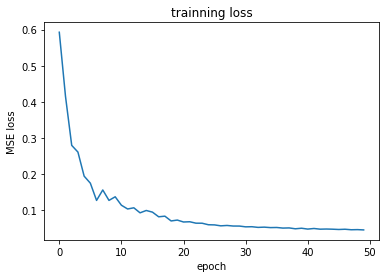

In [32]:
plt.plot(hist)
plt.title('trainning loss')
plt.xlabel('epoch')
plt.ylabel('MSE loss')

## test model

In [33]:
df2 = pro.index_daily(ts_code=args.stock_code, start_date=args.enddate, end_date='20201220')
df2.to_csv(args.stock_code+'_test.csv')
df2 = df2[['trade_date','open', 'high', 'close', 'low', 'vol', 'change']]
df2 = df2.sort_values(by='trade_date')

In [34]:
df2 = df2.sort_values(by='trade_date').reset_index()
df2.drop('index',axis=1,inplace=True)
df2

,trade_date,open,high,close,low,vol,change
0,20190902,2886.9418,2928.4793,2924.1063,2883.6823,202786807.0,37.8698
1,20190903,2925.9422,2930.1538,2930.1538,2915.1974,189001216.0,6.0475
2,20190904,2927.7470,2957.4116,2957.4116,2925.8825,225495907.0,27.2578
3,20190905,2972.6619,3015.8443,2985.8648,2972.6619,305438706.0,28.4532
4,20190906,2996.6216,2999.9434,2999.6013,2981.5983,216826035.0,13.7365
5,20190909,3023.7780,3026.2398,3024.7388,3005.6949,243377752.0,25.1375
6,20190910,3027.4103,3027.4103,3021.2024,3005.3825,240012947.0,-3.5364
7,20190911,3029.9334,3030.5570,3008.8118,3004.2152,229837362.0,-12.3906
8,20190912,3016.6267,3033.4730,3031.2351,3005.1948,196968701.0,22.4233
9,20190916,3041.9220,3042.9284,3030.7544,3020.0495,221878959.0,-0.4807


In [37]:
df2['MA'] = talib.SMA(df2['close'],args.window_size-1)
df2['EMA'] = talib.EMA(df2['close'], timeperiod = args.window_size-1)
df2['avg'] = talib.ADX(df2['high'],df2['low'], df2['close'], timeperiod=args.window_size-1)
df2['Relative'] = talib.RSI(df2['close'],args.window_size-1)
df2['up_band'], df2['mid_band'], df2['low_band'] =   \
                         talib.BBANDS(df2['close'], timeperiod =args.window_size-1)
df2 = df2.dropna()

D:\Anaconda\envs\pytorch3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\pytorch3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\envs\pytorch3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [38]:
price = df2[[args.predict_col]+args.features]
for i in range(len(price.columns)):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    price.iloc[:,i] = scaler.fit_transform(price.iloc[:,i].values.reshape(-1,1))

D:\Anaconda\envs\pytorch3.6\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\Anaconda\envs\pytorch3.6\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\Anaconda\envs\pytorch3.6\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [39]:
def test_data_process(stock, lookback):
    data_raw = stock
    assert type(data_raw)==np.ndarray,f'{type(data_raw)}'
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    print(data.shape)
    x = data[:,:-1,:]
    y = np.expand_dims(data[:,-1,0],-1)
    return [x,y]

x,y = test_data_process(price.values,args.window_size)
x.shape,y.shape

(71, 50, 8)


((71, 49, 8), (71, 1))

In [40]:
x = torch.from_numpy(x).type(torch.Tensor)
y = torch.from_numpy(y).type(torch.Tensor)

with torch.no_grad():
    y_pred = model(x)
    loss = criterion(y_pred,y)
loss

tensor(0.2707)

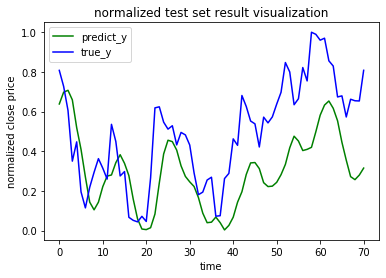

In [41]:
t_train = np.arange(0,len(y))
plt.plot(t_train, y_pred.detach(),color='g',label='predict_y')
plt.plot(t_train, y.detach(),color='b',label='true_y')

plt.title('normalized test set result visualization')
plt.xlabel('time')
plt.ylabel('normalized close price')
plt.legend()

In [42]:
up = np.array(y.detach())[:,0]>np.array(x.detach())[:,-1,0]
up_pred = np.array(y_pred.detach())[:,0]>np.array(x.detach())[:,-1,0]
np.mean(up==up_pred)

0.5492957746478874